In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
import re
import matplotlib.pyplot as plt
from venn import venn
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import numpy as np
import upsetplot
from upsetplot import plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
import disarray
import os

In [2]:
plt.rcParams["figure.figsize"] = (15,10)

# data

In [3]:
os.getcwd()

'/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/tests'

In [4]:
parentdir = "/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER"
seqs_path = parentdir + "/data/datasets/Minc3.fasta"
seqs_path

'/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/datasets/Minc3.fasta'

In [5]:
# create an empty dictionary
dict_seqs = {}

# here we are parsing the file with the dataset sequences
# specifying the format fasta
records = SeqIO.parse(seqs_path, "fasta")

# here we are filling the dictionary with {sequence_id : sequence}
for rec in records: 
    rec_seq = str(rec.seq)
    dict_seqs.update({rec.id : rec_seq})
    
# the dictionary {sequence_id : sequence}
dict_seqs

{'Minc3s00001g00001': 'MFFFDEDRDDGQQMDVKNNNNNSQIYHDFAIPQFNSRGGMVATAAIKVRHQKWMKSGLLPIQNFQNFRLRR',
 'Minc3s00001g00002': 'MAEVEQFKQNQNVINEEEKQQLEALNRSLFATIAEYTNIRNEHAKLIESQLCPIRCDIERRIRSADLDNFDKQKLGTVCNDLLNGLRQKGRQLCDLCDAIKMSSENLNQLKLCLFEWSDGSGMETKGMKPICSSFDMQKRLELLEDHYEKSLNDFQRAKNDLDILDKHLEFNGNLLQSSSSSLQTDVLTPLEQHQLIRTNDNISKMCTKLETRIRQIRTQQELQELKKINKKSAKAGTSKLFPSKNSEDVASFCVLKLEQLNIFEDGKEGKVKMANTDNSSNFRQNLFNYMENHNLYKIPLEGNGIRQIQPIRPSLPSVANNQKVSKNVETDEQKLKNALLEGLKPKKQLVSIGVQSPDFMALTPQKAKKTPTKTPKKSQTIIKTPETPKSTFAQTKTIEALPKNLVGYSKDFTTPTKNVDEPPFTLPENFTFNQQKQVVTEASTDTTTATSPNLLPTLLTTPSTTSIPTSTVLTTPATTTTNITSKQVDTLLPRTPPALLKENEEKEKTPEKEEEKQKENLFLEKEKVEEIEEKLKEQQQQPLISVGGDEGMEDEIIVAPQPVISNSNTSQEQSSISSVNFNFNMGGLGATSTPVNANRNPFGSIQPKPGGLFSGSPQSESWRSPFSPSVNTNQNNSGAFGSFGAISSGGGGGGSSGSSGFGTSPFGAAPIKPSVFGAAPVWNSPFGGGGIASSGGSSAAGSGGGGGGSMFGGGINKSGGSTTTGIGTTGFSAFASKSSAFGQLASQAQQQNEQQKPSLFGGGTATLNTSGGGGGGGSVFGGFGGSPTSNTGVKPAFGQKSSAFTTFRK',
 'Minc3s00001g00003': 'MFGKSAALIPLLFLIISIISVNAFRQQTVGVRGRLMCGNQPLKD

In [6]:
# by grep '>' nr_positive_dataset.faa | wc -l
# we checked the number of sequences in the fasta file was 624
len(dict_seqs)

43718

## motifs and clusters

In [7]:
df_clusters_motifs_occ = pd.read_csv('df_motifs_CLUMPs_standard_scaling_non_redundant.tsv')
df_clusters_motifs_occ.drop(columns = 'Unnamed: 0', inplace = True)
df_clusters_motifs_occ.rename(columns = {'CLUMP' : 'cluster'}, inplace = True)

In [8]:
# here we create a dataframe with the motifs and the corresponding cluster
# we'll select the clusters  1,5,6,8,2,0 since we've seen they're the most
# discriminative

df_clusters_motifs = df_clusters_motifs_occ.groupby(
    ['motif', 'cluster']).size().reset_index(name = 'tmp')
df_clusters_motifs = df_clusters_motifs.loc[:, ['motif', 'cluster']]
df_clusters_motifs.sort_values(by = 'cluster', inplace = True)
df_clusters_motifs.head()

,motif,cluster
178,WNS,0
133,NVY,0
179,WNT,0
180,WWS,0
58,FSL,0


In [9]:
df_clusters_motifs.shape

(185, 2)

In [10]:
best_clusters = [1,5,6,8,2,0]
df_clusters_motifs = df_clusters_motifs.loc[
    df_clusters_motifs['cluster'].isin(best_clusters)]
df_clusters_motifs.head()

,motif,cluster
178,WNS,0
133,NVY,0
179,WNT,0
180,WWS,0
58,FSL,0


In [11]:
df_clusters_motifs.shape

(117, 2)

In [12]:
lst_motifs = list(df_clusters_motifs.loc[:, 'motif'])
lst_motifs

['WNS',
 'NVY',
 'WNT',
 'WWS',
 'FSL',
 'YSHS',
 'CQY',
 'FTNS',
 'HWF',
 'HWT',
 'FSVF',
 'KYPN',
 'PYPGQ',
 'PTPK',
 'PTHP',
 'PPPK',
 'PKPY',
 'PGNV',
 'PKPF',
 'NGQP',
 'PYQSG',
 'KPPG',
 'FPSP',
 'PKPN',
 'YYPGG',
 'PSPK',
 'YPSG',
 'RGIG',
 'FKAK',
 'HGD',
 'KHP',
 'KKIS',
 'KMKG',
 'KQAQ',
 'KTKL',
 'KYKS',
 'MDKF',
 'AYKN',
 'WKPK',
 'VKSY',
 'PKAK',
 'PKPK',
 'IKNN',
 'PKYK',
 'QEAF',
 'FGGG',
 'CNICG',
 'CGSGG',
 'CGNCG',
 'CGKAG',
 'CQNGG',
 'PSPGG',
 'PNPGG',
 'CGIGR',
 'CNGGG',
 'CCCGF',
 'CGGG',
 'CCCGG',
 'CCSGY',
 'CGDSG',
 'CGDGF',
 'CGCCA',
 'CGIGG',
 'CGCCG',
 'EKEKG',
 'GEETK',
 'KNEKK',
 'DEEKK',
 'EKEKK',
 'EEEKK',
 'EEER',
 'GEGKK',
 'EEGKK',
 'GEEKK',
 'EEETK',
 'KEEEK',
 'KKEKK',
 'KDEKK',
 'KEDKK',
 'KEEDK',
 'KEEIK',
 'KEEKE',
 'KEEKG',
 'KKETK',
 'KEEKI',
 'KEENK',
 'KEERK',
 'KEESK',
 'KEETG',
 'KELKK',
 'KEEKK',
 'KEETK',
 'KDMK',
 'QKEE',
 'KKEG',
 'THE',
 'RKEE',
 'KDKM',
 'KDKK',
 'KKGKK',
 'RYDD',
 'KKPK',
 'DEKT',
 'QDVD',
 'KDKC',
 'KRDD',
 'TDKK',


In [13]:
len(lst_motifs)

117

## IDs MERCI 4 motifs publi

In [14]:
def read_id_merci(dir_MERCI_ids):
    """ read_id_merci
        -------------
        This function extracts the list of IDs of the sequences
        where a motif was found from the output of file obtained by MERCI.
        
        Arguments: 
        dir_MERCI_ids -- path of the output file of MERCI
        
        Output:
        lst_ids -- list of the sequences IDs
    """
    lst_ids = []
    with open(dir_MERCI_ids, "r") as f:
        f.seek(0)
        for line in f:
            tag = 0
            ### we look for the line "COVERAGE"
            if line.startswith("COVERAGE"): 
                tag = 1
                if tag == 1:
                    ### we create a list with the values of each line
                    lst_lines = f.readlines()
                    
                    ### this way we delete the characters "\n" at the end
                    ### of each element of the list
                    string_out_merci = ','.join(lst_lines)
                    
                    ### This way we don't have an element per line
                    ### because we substitute all the "\n" with ""
                    string_out_merci2= re.sub("\n",'',string_out_merci)
                    
                    ### This way we separate all the elements by a comma
                    final_lst_out_merci = string_out_merci2.split(sep=",")
                    
                    ### We pop the first element of the list (********)
                    final_lst_out_merci.pop(0)
                    
                    ### We pop the last and the second last elements of the
                    ### list, since they are not sequence IDs
                    final_lst_out_merci.pop()
                    final_lst_out_merci.pop()
                    
                    ### we pass from elements of the list like: 
                    ### Minc3s01822g26535 (4 motifs match)
                    ### to an element that contains only the ID like:
                    ### Minc3s01822g26535
                    for ID in final_lst_out_merci:
                        lst_ids.append(ID.split()[0])
                        
                    return lst_ids

In [15]:
def save_merci_ids_to_file(merci_ids, specifications = ""):
    """save_merci_ids_to_file
       ----------------------
       This function stores the merci ids to 
       a csv file.
       
       Arguments:
       merci_ids -- list of merci ids
       specifications -- any specification from the merci analysis 
                         (example: "first_100AA")
    """
    
    name_col = "merci_ids" + specifications
    name_file = name_col +".csv"
    df_merci_ids = pd.DataFrame(merci_ids)
    df_merci_ids.rename(columns = {0:name_col}, inplace = True)
    df_merci_ids.to_csv(name_file)
    return df_merci_ids

In [16]:
os.getcwd()
dir_MERCI_ids_100first = '/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/Minc3.occurences.100first.txt'
dir_MERCI_ids_100first

'/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/Minc3.occurences.100first.txt'

In [17]:
lst_ids_100_first = read_id_merci(dir_MERCI_ids_100first)
print("length of lst_ids_100_first: ", len(lst_ids_100_first), "\n")
lst_ids_100_first

length of lst_ids_100_first:  12177 



['Minc3s01822g26535',
 'Minc3s00759g16976',
 'Minc3s03327g33530',
 'Minc3s00344g10655',
 'Minc3s00974g19477',
 'Minc3s09290g43082',
 'Minc3s02350g29607',
 'Minc3s00550g14131',
 'Minc3s00432g12225',
 'Minc3s04814g37051',
 'Minc3s00008g00568',
 'Minc3s00018g01132',
 'Minc3s04583g36591',
 'Minc3s06339g39685',
 'Minc3s00806g17595',
 'Minc3s00146g06007',
 'Minc3s05239g37862',
 'Minc3s00664g15800',
 'Minc3s01624g25177',
 'Minc3s00107g04766',
 'Minc3s00776g17189',
 'Minc3s02527g30458',
 'Minc3s11160g44675',
 'Minc3s00240g08339',
 'Minc3s00230g08122',
 'Minc3s00441g12374',
 'Minc3s01077g20501',
 'Minc3s07889g41656',
 'Minc3s06171g39445',
 'Minc3s00431g12195',
 'Minc3s05310g37990',
 'Minc3s06156g39422',
 'Minc3s00925g18941',
 'Minc3s07519g41218',
 'Minc3s00398g11608',
 'Minc3s03120g32863',
 'Minc3s00097g04468',
 'Minc3s00645g15565',
 'Minc3s00312g09956',
 'Minc3s00073g03598',
 'Minc3s03850g34976',
 'Minc3s00652g15651',
 'Minc3s03863g35016',
 'Minc3s00089g04206',
 'Minc3s05294g37952',
 'Minc3s00

In [18]:
save_merci_ids_to_file(lst_ids_100_first, specifications = "100_first")

,merci_ids100_first
0,Minc3s01822g26535
1,Minc3s00759g16976
2,Minc3s03327g33530
3,Minc3s00344g10655
4,Minc3s00974g19477
...,...
12172,Minc3s05606g38512
12173,Minc3s02425g29964
12174,Minc3s02432g30010
12175,Minc3s01532g24519


In [19]:
os.getcwd()
dir_MERCI_ids_30first = '/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/Minc3.occurences.30first.txt'
dir_MERCI_ids_30first

'/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/Minc3.occurences.30first.txt'

In [20]:
lst_ids_30_first = read_id_merci(dir_MERCI_ids_30first)
print("length of lst_ids_30_first: ", len(lst_ids_30_first), "\n")
lst_ids_30_first

length of lst_ids_30_first:  5217 



['Minc3s01798g26384',
 'Minc3s03289g33422',
 'Minc3s00370g11151',
 'Minc3s09290g43082',
 'Minc3s00009g00635',
 'Minc3s02720g31334',
 'Minc3s00103g04642',
 'Minc3s02756g31460',
 'Minc3s01802g26418',
 'Minc3s00515g13598',
 'Minc3s00200g07402',
 'Minc3s00002g00141',
 'Minc3s11929g45243',
 'Minc3s05524g38366',
 'Minc3s00047g02568',
 'Minc3s00173g06739',
 'Minc3s00516g13620',
 'Minc3s00158g06359',
 'Minc3s00376g11251',
 'Minc3s00974g19468',
 'Minc3s02217g28916',
 'Minc3s08225g42033',
 'Minc3s00338g10496',
 'Minc3s00341g10562',
 'Minc3s07945g41727',
 'Minc3s00070g03463',
 'Minc3s06972g40565',
 'Minc3s02409g29887',
 'Minc3s01964g27469',
 'Minc3s00491g13218',
 'Minc3s00008g00545',
 'Minc3s00030g01816',
 'Minc3s00709g16393',
 'Minc3s10963g44503',
 'Minc3s03035g32514',
 'Minc3s00861g18200',
 'Minc3s01840g26660',
 'Minc3s00326g10282',
 'Minc3s01151g21207',
 'Minc3s00047g02578',
 'Minc3s00770g17111',
 'Minc3s02217g28915',
 'Minc3s02734g31393',
 'Minc3s00545g14045',
 'Minc3s00008g00570',
 'Minc3s04

In [21]:
save_merci_ids_to_file(lst_ids_30_first, specifications = "30_first")

,merci_ids30_first
0,Minc3s01798g26384
1,Minc3s03289g33422
2,Minc3s00370g11151
3,Minc3s09290g43082
4,Minc3s00009g00635
...,...
5212,Minc3s00112g04939
5213,Minc3s00143g05928
5214,Minc3s04501g36417
5215,Minc3s06304g39644


# Counting

In [22]:
# calculating the start and ending positions

# here we create an empty list
lst_dict = [] 

# what we do here is to:
# 1. go through the list of motifs
# 2. for each motif, go through the dictionary of sequences,
# 3. assign the sequence to the variable record
# 4. run the finditer (to find the start and end positions)
# 5. append the motif, the sequence id, the start and end position 
#    to the list. 
for motif in lst_motifs:
        for seq_id in dict_seqs:
            record = dict_seqs[seq_id]
            for match in re.finditer(motif, record):
                lst_dict.append({'motif':motif, 'id':seq_id, 
                                 'start':match.start(), 'end':match.end()})

In [23]:
# create a pd df from this list
df_st_end_position = pd.DataFrame(lst_dict)
df_st_end_position.head(5)

,motif,id,start,end
0,WNS,Minc3s00001g00002,682,685
1,WNS,Minc3s00001g00013,96,99
2,WNS,Minc3s00002g00137,224,227
3,WNS,Minc3s00003g00177,209,212
4,WNS,Minc3s00005g00338,25,28


In [24]:
df_st_end_position.shape

(35348, 4)

In [25]:
df_st_end_position.id.drop_duplicates()

0        Minc3s00001g00002
1        Minc3s00001g00013
2        Minc3s00002g00137
3        Minc3s00003g00177
4        Minc3s00005g00338
               ...        
35295    Minc3s00224g07955
35329    Minc3s02387g29784
35334    Minc3s04846g37128
35336    Minc3s05419g38206
35338    Minc3s06300g39637
Name: id, Length: 18879, dtype: object

In [26]:
# we calculate how many times a motif is present in a sequence
df_seq_occ = df_st_end_position.groupby([
    'motif','id']).size().reset_index(name='nb_counts')
df_seq_occ.head()

,motif,id,nb_counts
0,AYKN,Minc3s00004g00238,1
1,AYKN,Minc3s00012g00792,1
2,AYKN,Minc3s00018g01165,1
3,AYKN,Minc3s00020g01263,1
4,AYKN,Minc3s00064g03225,1


In [27]:
df_seq_occ.shape

(32156, 3)

In [28]:
df_counting = df_clusters_motifs.merge(df_seq_occ)
df_counting = df_counting[['id', 'cluster', 'motif', 'nb_counts']]
df_counting.head()

,id,cluster,motif,nb_counts
0,Minc3s00001g00002,0,WNS,1
1,Minc3s00001g00013,0,WNS,1
2,Minc3s00002g00137,0,WNS,1
3,Minc3s00003g00177,0,WNS,1
4,Minc3s00005g00338,0,WNS,1


In [29]:
df_counting.shape

(32156, 4)

# Co-occurrences

## Positive dataset

In [30]:
df_id_cluster = df_counting.loc[:, ['id', 'cluster']].drop_duplicates()
df_id_cluster.head()

,id,cluster
0,Minc3s00001g00002,0
1,Minc3s00001g00013,0
2,Minc3s00002g00137,0
3,Minc3s00003g00177,0
4,Minc3s00005g00338,0


In [31]:
best_clusters = [1,5,6,8,2,0]
best_clusters

[1, 5, 6, 8, 2, 0]

In [32]:
## example of creating a subset of the dataframe
# to find all the sequences for cluster 0
df_id_cluster[df_id_cluster['cluster'] == 0].drop_duplicates().head()

,id,cluster
0,Minc3s00001g00002,0
1,Minc3s00001g00013,0
2,Minc3s00002g00137,0
3,Minc3s00003g00177,0
4,Minc3s00005g00338,0


In [33]:
# creating a list of all the 
list(df_id_cluster[df_id_cluster['cluster'] == 0].drop_duplicates().id)

['Minc3s00001g00002',
 'Minc3s00001g00013',
 'Minc3s00002g00137',
 'Minc3s00003g00177',
 'Minc3s00005g00338',
 'Minc3s00005g00339',
 'Minc3s00006g00360',
 'Minc3s00006g00375',
 'Minc3s00008g00568',
 'Minc3s00008g00573',
 'Minc3s00009g00628',
 'Minc3s00010g00648',
 'Minc3s00010g00652',
 'Minc3s00010g00657',
 'Minc3s00010g00685',
 'Minc3s00011g00735',
 'Minc3s00011g00745',
 'Minc3s00014g00873',
 'Minc3s00014g00904',
 'Minc3s00014g00914',
 'Minc3s00016g01068',
 'Minc3s00019g01192',
 'Minc3s00019g01211',
 'Minc3s00019g01258',
 'Minc3s00020g01297',
 'Minc3s00022g01392',
 'Minc3s00022g01399',
 'Minc3s00024g01588',
 'Minc3s00027g01710',
 'Minc3s00030g01814',
 'Minc3s00032g01945',
 'Minc3s00034g02034',
 'Minc3s00036g02092',
 'Minc3s00036g02094',
 'Minc3s00036g02105',
 'Minc3s00036g02106',
 'Minc3s00036g02107',
 'Minc3s00038g02236',
 'Minc3s00044g02429',
 'Minc3s00044g02454',
 'Minc3s00044g02456',
 'Minc3s00044g02458',
 'Minc3s00046g02502',
 'Minc3s00047g02567',
 'Minc3s00049g02641',
 'Minc3s00

In [34]:
dict_clu_seqs = {}

for i in best_clusters:
    df_tmp = df_id_cluster[df_id_cluster['cluster'] == i].drop_duplicates()
    dict_clu_seqs[i] = list(df_tmp.id)
dict_clu_seqs

{1: ['Minc3s00002g00163',
  'Minc3s00005g00302',
  'Minc3s00009g00589',
  'Minc3s00012g00776',
  'Minc3s00014g00887',
  'Minc3s00014g00892',
  'Minc3s00029g01792',
  'Minc3s00030g01827',
  'Minc3s00046g02516',
  'Minc3s00080g03871',
  'Minc3s00084g04034',
  'Minc3s00086g04072',
  'Minc3s00088g04188',
  'Minc3s00095g04400',
  'Minc3s00096g04442',
  'Minc3s00113g04969',
  'Minc3s00114g05009',
  'Minc3s00116g05066',
  'Minc3s00121g05211',
  'Minc3s00126g05397',
  'Minc3s00128g05456',
  'Minc3s00139g05823',
  'Minc3s00143g05931',
  'Minc3s00169g06631',
  'Minc3s00176g06813',
  'Minc3s00188g07120',
  'Minc3s00188g07130',
  'Minc3s00197g07304',
  'Minc3s00201g07431',
  'Minc3s00228g08059',
  'Minc3s00239g08323',
  'Minc3s00248g08515',
  'Minc3s00248g08536',
  'Minc3s00259g08814',
  'Minc3s00276g09213',
  'Minc3s00284g09389',
  'Minc3s00319g10103',
  'Minc3s00335g10423',
  'Minc3s00357g10899',
  'Minc3s00382g11359',
  'Minc3s00387g11444',
  'Minc3s00418g12003',
  'Minc3s00491g13218',
  'Minc3

In [35]:
dict_clu_seqs_set = {}
for cluster, sequences in dict_clu_seqs.items():
    dict_clu_seqs_set[cluster] = set(sequences)
dict_clu_seqs_set

{1: {'Minc3s00429g12158',
  'Minc3s01984g27586',
  'Minc3s00021g01348',
  'Minc3s00829g17860',
  'Minc3s03928g35161',
  'Minc3s00487g13162',
  'Minc3s04473g36365',
  'Minc3s10476g44117',
  'Minc3s01342g22931',
  'Minc3s01885g26955',
  'Minc3s00264g08932',
  'Minc3s01755g26079',
  'Minc3s08361g42179',
  'Minc3s01149g21182',
  'Minc3s05541g38398',
  'Minc3s09948g43663',
  'Minc3s04383g36163',
  'Minc3s02039g27910',
  'Minc3s00387g11433',
  'Minc3s02967g32255',
  'Minc3s03503g34031',
  'Minc3s00158g06352',
  'Minc3s03673g34494',
  'Minc3s03175g33041',
  'Minc3s00129g05513',
  'Minc3s00020g01308',
  'Minc3s00036g02114',
  'Minc3s00235g08234',
  'Minc3s05799g38846',
  'Minc3s02961g32229',
  'Minc3s00841g17978',
  'Minc3s00147g06033',
  'Minc3s11050g44573',
  'Minc3s00833g17896',
  'Minc3s00844g18014',
  'Minc3s00972g19452',
  'Minc3s02154g28582',
  'Minc3s02910g32038',
  'Minc3s00224g07965',
  'Minc3s02040g27924',
  'Minc3s00551g14152',
  'Minc3s03238g33255',
  'Minc3s03341g33562',
  'Minc3

In [36]:
def plot_upset(dict_clu_seqs_set):
    upset_data_sub = upsetplot.from_contents(dict_clu_seqs_set)
    upsetplot.plot(upset_data_sub, show_counts='%d', 
                   sort_by='cardinality', sort_categories_by = None)
    ## order of the categories is upside down: the best cluster is the last
    ## not the first
    return

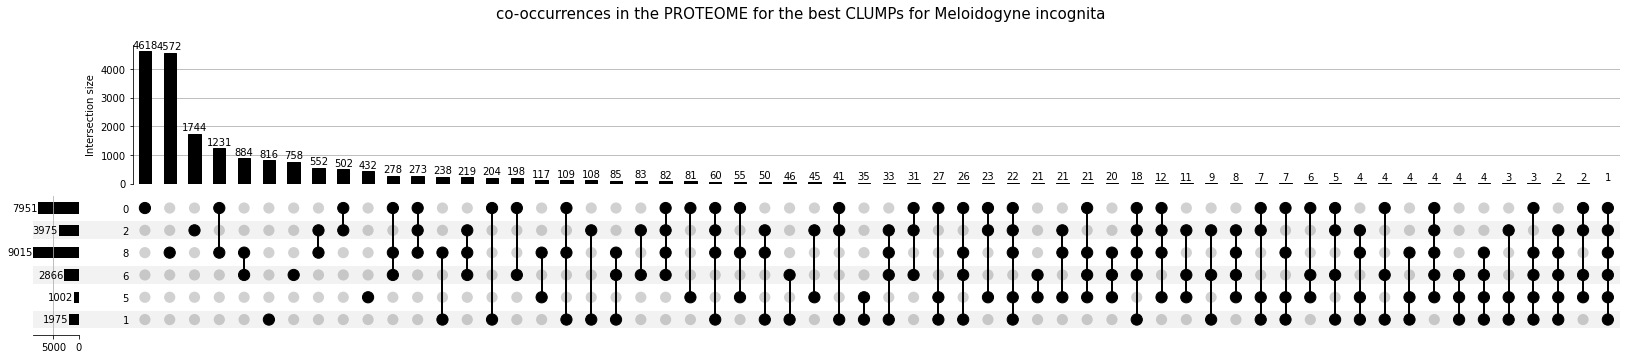

In [37]:
plt.rcParams["figure.figsize"] = (15,10)
plot_upset(dict_clu_seqs_set)
plt.suptitle(
    'co-occurrences in the PROTEOME for the best CLUMPs for Meloidogyne incognita', size = 15)
plt.savefig('co_occ_PROTEOME_clusters_minc.pdf')

In [38]:
## we are going to see all the intersections
X = 'id'
Y = 'cluster'
cont_id_cluster = df_id_cluster[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont_id_cluster = cont_id_cluster.rename_axis(None,axis=1)
cont_id_cluster = cont_id_cluster.reset_index()
cont_id_cluster.head()

,id,0,1,2,5,6,8
0,Minc3s00001g00002,1,0,0,1,1,0
1,Minc3s00001g00003,0,0,0,0,0,1
2,Minc3s00001g00006,0,0,0,0,1,1
3,Minc3s00001g00008,0,0,0,0,0,1
4,Minc3s00001g00012,1,0,0,0,0,0


In [39]:
cont_id_cluster['row_sums'] = cont_id_cluster.sum(axis = 1)

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_24881/2994467588.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cont_id_cluster['row_sums'] = cont_id_cluster.sum(axis = 1)


In [40]:
cont_id_cluster[(cont_id_cluster[0] >= 1) | (cont_id_cluster[1] >= 1)|(cont_id_cluster[2] >= 1) | (cont_id_cluster[5] >= 1) |(cont_id_cluster[6] >= 1) | (cont_id_cluster[8] >= 1)]

,id,0,1,2,5,6,8,row_sums
0,Minc3s00001g00002,1,0,0,1,1,0,3
1,Minc3s00001g00003,0,0,0,0,0,1,1
2,Minc3s00001g00006,0,0,0,0,1,1,2
3,Minc3s00001g00008,0,0,0,0,0,1,1
4,Minc3s00001g00012,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
18874,Minc3s12070g45343,0,0,0,0,0,1,1
18875,Minc3s12078g45345,1,0,0,0,0,0,1
18876,Minc3s12084g45347,1,0,0,0,0,0,1
18877,Minc3s12086g45349,1,0,0,0,0,0,1


In [41]:
cont_id_cluster[cont_id_cluster.row_sums >= 1] 

,id,0,1,2,5,6,8,row_sums
0,Minc3s00001g00002,1,0,0,1,1,0,3
1,Minc3s00001g00003,0,0,0,0,0,1,1
2,Minc3s00001g00006,0,0,0,0,1,1,2
3,Minc3s00001g00008,0,0,0,0,0,1,1
4,Minc3s00001g00012,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
18874,Minc3s12070g45343,0,0,0,0,0,1,1
18875,Minc3s12078g45345,1,0,0,0,0,0,1
18876,Minc3s12084g45347,1,0,0,0,0,0,1
18877,Minc3s12086g45349,1,0,0,0,0,0,1


In [42]:
len(cont_id_cluster.id)

18879

In [43]:
df_1_5 = cont_id_cluster.loc[:, ['id', 1,5]]
df_1_5['rows_sums'] = df_1_5.sum(axis = 1)
df_1_5.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_24881/1112424269.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1_5['rows_sums'] = df_1_5.sum(axis = 1)


,id,1,5,rows_sums
0,Minc3s00001g00002,0,1,1
1,Minc3s00001g00003,0,0,0
2,Minc3s00001g00006,0,0,0
3,Minc3s00001g00008,0,0,0
4,Minc3s00001g00012,0,0,0


In [44]:
print('how many sequences contain at least a CLUMP among the six best?')
print(sum(cont_id_cluster['row_sums'] >= 1))
print('\n')

print('% many sequences contain at least a CLUMP among the six best?')
print(sum(cont_id_cluster['row_sums'] >= 1)/len(dict_seqs))

how many sequences contain at least a CLUMP among the six best?
18879


% many sequences contain at least a CLUMP among the six best?
0.4318358570840386


In [45]:
print('how many sequences contain at least a co-occurrence between different CLUMPs among the six best?')
print(sum(cont_id_cluster['row_sums'] >= 2))
print('\n')

print('% sequences contain at least a co-occurrence between different CLUMPs among the six best?')
print(sum(cont_id_cluster['row_sums'] >= 2)/len(dict_seqs))

how many sequences contain at least a co-occurrence between different CLUMPs among the six best?
5939


% sequences contain at least a co-occurrence between different CLUMPs among the six best?
0.1358479344892264


In [46]:
print('how many sequences contain at least one CLUMP among 1, 5?')
print(sum(df_1_5['rows_sums'] >= 1))
print('\n')
print('% sequences contain at least one CLUMP among 1, 5?')
print(sum(df_1_5['rows_sums'] >= 1)/len(dict_seqs))

how many sequences contain at least one CLUMP among 1, 5?
2854


% sequences contain at least one CLUMP among 1, 5?
0.06528203485978315


In [47]:
print('how many sequences contain at least a co-occurrence between different CLUMPs among the six best and at least one CLUMP 1, 5?')
print(sum((cont_id_cluster['row_sums'] >= 2) & (df_1_5['rows_sums'] >= 1)))
print('\n')

print('% sequences contain at least a co-occurrence between different CLUMPs among the six best?')
print(sum((cont_id_cluster['row_sums'] >= 2) & (df_1_5['rows_sums'] >= 1))/len(dict_seqs))

how many sequences contain at least a co-occurrence between different CLUMPs among the six best and at least one CLUMP 1, 5?
1606


% sequences contain at least a co-occurrence between different CLUMPs among the six best?
0.036735440779541606


In [48]:
print('how many sequences contain at least a co-occurrence between different CLUMPs among 1, 5?')
print(sum(df_1_5['rows_sums'] >= 2))
print('\n')

print('% sequences contain at least a co-occurrence between different CLUMPs among 1, 5?')
print(sum(df_1_5['rows_sums'] >= 2)/len(dict_seqs))

how many sequences contain at least a co-occurrence between different CLUMPs among 1, 5?
123


% sequences contain at least a co-occurrence between different CLUMPs among 1, 5?
0.002813486435793037


# Subpopulations

In [49]:
def save_supop_to_file(subp_ids, nb_subp, proteome = ""):
    """save_supop_to_file
       ------------------
       This function stores a subpopulation ids to 
       a csv file.
       
       Arguments:
       subp_ids -- list of subpopulation ids
       nb_subp -- string of the number of the subpopulation
       proteome -- string to indicate if the subpopulations 
                   are calculated from the proteome
    """
    name_col = proteome + "subpopulation" + nb_subp + "_ids"
    name_file= name_col +".csv"
    df_subp_ids = pd.DataFrame(subp_ids)
    df_subp_ids.rename(columns = {0:name_col}, inplace = True)
    df_subp_ids.to_csv(name_file)
    return df_subp_ids

## Subpopulation calculations

In [50]:
## Subpopulation 1
subpopulation1 = df_1_5[df_1_5['rows_sums'] >= 2]
subpopulation1_ids = list(subpopulation1.id)
print(len(subpopulation1_ids))
subpopulation1_ids

123


['Minc3s00001g00015',
 'Minc3s00008g00574',
 'Minc3s00017g01106',
 'Minc3s00043g02427',
 'Minc3s00046g02506',
 'Minc3s00049g02641',
 'Minc3s00049g02646',
 'Minc3s00070g03463',
 'Minc3s00074g03645',
 'Minc3s00088g04161',
 'Minc3s00107g04759',
 'Minc3s00139g05823',
 'Minc3s00147g06033',
 'Minc3s00149g06108',
 'Minc3s00157g06329',
 'Minc3s00167g06602',
 'Minc3s00169g06636',
 'Minc3s00178g06876',
 'Minc3s00182g06991',
 'Minc3s00193g07189',
 'Minc3s00193g07197',
 'Minc3s00193g07198',
 'Minc3s00194g07218',
 'Minc3s00197g07317',
 'Minc3s00232g08175',
 'Minc3s00235g08234',
 'Minc3s00239g08323',
 'Minc3s00279g09275',
 'Minc3s00297g09644',
 'Minc3s00319g10115',
 'Minc3s00349g10746',
 'Minc3s00387g11444',
 'Minc3s00431g12202',
 'Minc3s00456g12617',
 'Minc3s00465g12805',
 'Minc3s00489g13198',
 'Minc3s00514g13580',
 'Minc3s00545g14052',
 'Minc3s00573g14473',
 'Minc3s00578g14541',
 'Minc3s00582g14626',
 'Minc3s00583g14645',
 'Minc3s00610g15086',
 'Minc3s00623g15247',
 'Minc3s00687g16084',
 'Minc3s00

In [51]:
save_supop_to_file(subpopulation1_ids, "1", "proteome_")

,proteome_subpopulation1_ids
0,Minc3s00001g00015
1,Minc3s00008g00574
2,Minc3s00017g01106
3,Minc3s00043g02427
4,Minc3s00046g02506
...,...
118,Minc3s09707g43466
119,Minc3s09724g43482
120,Minc3s09859g43597
121,Minc3s10519g44141


In [52]:
## Subpopulation2
subpopulation2_ids = list(set(df_1_5[df_1_5['rows_sums'] > 0].id) & set(
    cont_id_cluster[cont_id_cluster['row_sums'] >= 2].id))
print(len(subpopulation2_ids))
print(len(subpopulation2_ids), "-", len(subpopulation1_ids))
subpopulation2_ids = list(set(subpopulation2_ids) - set(subpopulation1_ids))
print(len(subpopulation2_ids))
subpopulation2_ids

1606
1606 - 123
1483


['Minc3s01064g20347',
 'Minc3s03872g35037',
 'Minc3s00382g11361',
 'Minc3s02353g29623',
 'Minc3s04121g35531',
 'Minc3s03928g35161',
 'Minc3s00065g03283',
 'Minc3s00487g13162',
 'Minc3s04473g36365',
 'Minc3s06402g39776',
 'Minc3s00052g02786',
 'Minc3s10476g44117',
 'Minc3s00607g15035',
 'Minc3s00036g02144',
 'Minc3s00057g02959',
 'Minc3s00683g16027',
 'Minc3s01885g26955',
 'Minc3s03226g33200',
 'Minc3s00264g08932',
 'Minc3s11676g45062',
 'Minc3s00277g09221',
 'Minc3s08361g42179',
 'Minc3s01046g20159',
 'Minc3s05873g38949',
 'Minc3s08270g42071',
 'Minc3s00143g05936',
 'Minc3s00176g06825',
 'Minc3s00465g12807',
 'Minc3s07054g40666',
 'Minc3s02615g30891',
 'Minc3s06179g39460',
 'Minc3s00065g03315',
 'Minc3s00387g11433',
 'Minc3s00683g16038',
 'Minc3s02967g32255',
 'Minc3s01592g24970',
 'Minc3s00176g06827',
 'Minc3s00861g18203',
 'Minc3s04619g36673',
 'Minc3s03503g34031',
 'Minc3s00158g06352',
 'Minc3s03175g33041',
 'Minc3s00235g08237',
 'Minc3s00053g02818',
 'Minc3s01331g22844',
 'Minc3s00

In [53]:
save_supop_to_file(subpopulation2_ids, "2", "proteome_")

,proteome_subpopulation2_ids
0,Minc3s01064g20347
1,Minc3s03872g35037
2,Minc3s00382g11361
3,Minc3s02353g29623
4,Minc3s04121g35531
...,...
1478,Minc3s02356g29636
1479,Minc3s00253g08649
1480,Minc3s01193g21585
1481,Minc3s00024g01544


In [54]:
## Subpopulation3A
subpopulation3A = cont_id_cluster[cont_id_cluster['row_sums'] >= 2]
subpopulation3A_ids = list(subpopulation3A.id)
print(len(subpopulation3A_ids))
print(len(subpopulation3A_ids), "-", len(subpopulation2_ids))
subpopulation3A_ids = list(set(subpopulation3A_ids) - set(subpopulation2_ids))
print(len(subpopulation3A_ids), "-", len(subpopulation1_ids))
subpopulation3A_ids = list(set(subpopulation3A_ids) - set(subpopulation1_ids))
print(len(subpopulation3A_ids))
subpopulation3A_ids

5939
5939 - 1483
4456 - 123
4333


['Minc3s00147g06047',
 'Minc3s00278g09256',
 'Minc3s00631g15372',
 'Minc3s00632g15383',
 'Minc3s00581g14601',
 'Minc3s00303g09774',
 'Minc3s01325g22793',
 'Minc3s03477g33956',
 'Minc3s02806g31633',
 'Minc3s00142g05882',
 'Minc3s02432g30010',
 'Minc3s01786g26297',
 'Minc3s03345g33577',
 'Minc3s00167g06596',
 'Minc3s02414g29905',
 'Minc3s00133g05630',
 'Minc3s02653g31062',
 'Minc3s02663g31103',
 'Minc3s02722g31351',
 'Minc3s00635g15412',
 'Minc3s04102g35476',
 'Minc3s00100g04563',
 'Minc3s01056g20272',
 'Minc3s01835g26626',
 'Minc3s04091g35453',
 'Minc3s07232g40882',
 'Minc3s02480g30258',
 'Minc3s01439g23833',
 'Minc3s02046g27961',
 'Minc3s01269g22302',
 'Minc3s02050g27982',
 'Minc3s01444g23870',
 'Minc3s06153g39416',
 'Minc3s08296g42107',
 'Minc3s01926g27232',
 'Minc3s00700g16272',
 'Minc3s00907g18755',
 'Minc3s02289g29283',
 'Minc3s00050g02697',
 'Minc3s03452g33882',
 'Minc3s00848g18057',
 'Minc3s02396g29842',
 'Minc3s01427g23728',
 'Minc3s00260g08822',
 'Minc3s08180g41985',
 'Minc3s00

In [55]:
save_supop_to_file(subpopulation3A_ids, "3A", "proteome_")

,proteome_subpopulation3A_ids
0,Minc3s00147g06047
1,Minc3s00278g09256
2,Minc3s00631g15372
3,Minc3s00632g15383
4,Minc3s00581g14601
...,...
4328,Minc3s00125g05327
4329,Minc3s02493g30315
4330,Minc3s00091g04260
4331,Minc3s00089g04216


In [56]:
## Subpopulation3B
subpopulation3B = df_1_5[df_1_5['rows_sums'] >= 1]
subpopulation3B_ids = list(subpopulation3B.id)
print(len(subpopulation3B_ids))
print(len(subpopulation3B_ids), "-", len(subpopulation2_ids))
subpopulation3B_ids = list(set(subpopulation3B_ids) - set(subpopulation2_ids))
print(len(subpopulation3B_ids), "-", len(subpopulation1_ids))
subpopulation3B_ids = list(set(subpopulation3B_ids) - set(subpopulation1_ids))
print(len(subpopulation3B_ids))
subpopulation3B_ids

2854
2854 - 1483
1371 - 123
1248


['Minc3s02366g29684',
 'Minc3s00009g00612',
 'Minc3s00429g12158',
 'Minc3s00052g02793',
 'Minc3s03288g33419',
 'Minc3s01984g27586',
 'Minc3s00021g01348',
 'Minc3s00829g17860',
 'Minc3s01865g26840',
 'Minc3s00165g06535',
 'Minc3s00075g03705',
 'Minc3s01348g23002',
 'Minc3s00197g07311',
 'Minc3s01204g21693',
 'Minc3s02021g27819',
 'Minc3s00379g11314',
 'Minc3s00019g01195',
 'Minc3s02082g28164',
 'Minc3s05119g37626',
 'Minc3s01070g20418',
 'Minc3s01342g22931',
 'Minc3s08637g42453',
 'Minc3s01135g21054',
 'Minc3s01149g21182',
 'Minc3s05541g38398',
 'Minc3s09948g43663',
 'Minc3s07883g41648',
 'Minc3s04383g36163',
 'Minc3s02736g31398',
 'Minc3s03680g34511',
 'Minc3s03801g34855',
 'Minc3s00751g16871',
 'Minc3s02039g27910',
 'Minc3s00182g06997',
 'Minc3s10660g44253',
 'Minc3s00999g19719',
 'Minc3s00083g03967',
 'Minc3s00319g10103',
 'Minc3s00335g10423',
 'Minc3s02858g31835',
 'Minc3s00568g14404',
 'Minc3s03673g34494',
 'Minc3s04263g35883',
 'Minc3s00129g05513',
 'Minc3s00829g17848',
 'Minc3s03

In [57]:
save_supop_to_file(subpopulation3B_ids, "3B", "proteome_")

,proteome_subpopulation3B_ids
0,Minc3s02366g29684
1,Minc3s00009g00612
2,Minc3s00429g12158
3,Minc3s00052g02793
4,Minc3s03288g33419
...,...
1243,Minc3s05970g39108
1244,Minc3s00849g18075
1245,Minc3s00701g16296
1246,Minc3s00637g15452


In [58]:
## Subpopulation4
subpopulation4 = cont_id_cluster[cont_id_cluster['row_sums'] >= 1]
subpopulation4_ids = list(subpopulation4.id)
print(len(subpopulation4_ids))
print(len(subpopulation4_ids), "-", len(subpopulation3A_ids))
subpopulation4_ids = list(set(subpopulation4_ids) - set(subpopulation3A_ids))
print(len(subpopulation4_ids), "-", len(subpopulation3B_ids))
subpopulation4_ids = list(set(subpopulation4_ids) - set(subpopulation3B_ids))
print(len(subpopulation4_ids), "-", len(subpopulation2_ids))
subpopulation4_ids = list(set(subpopulation4_ids) - set(subpopulation2_ids))
print(len(subpopulation4_ids), "-", len(subpopulation1_ids))
subpopulation4_ids = list(set(subpopulation4_ids) - set(subpopulation1_ids))
print(len(subpopulation4_ids))
subpopulation4_ids

18879
18879 - 4333
14546 - 1248
13298 - 1483
11815 - 123
11692


['Minc3s00168g06616',
 'Minc3s07318g40985',
 'Minc3s00129g05509',
 'Minc3s01509g24370',
 'Minc3s02960g32223',
 'Minc3s07977g41761',
 'Minc3s01541g24574',
 'Minc3s00368g11121',
 'Minc3s03193g33100',
 'Minc3s04947g37313',
 'Minc3s00416g11948',
 'Minc3s00879g18421',
 'Minc3s00916g18847',
 'Minc3s02844g31783',
 'Minc3s01603g25042',
 'Minc3s03700g34553',
 'Minc3s09673g43438',
 'Minc3s00553g14189',
 'Minc3s05824g38877',
 'Minc3s01152g21219',
 'Minc3s03798g34847',
 'Minc3s00319g10104',
 'Minc3s00125g05349',
 'Minc3s01398g23479',
 'Minc3s03007g32405',
 'Minc3s00320g10130',
 'Minc3s10183g43871',
 'Minc3s00044g02449',
 'Minc3s00200g07389',
 'Minc3s00111g04903',
 'Minc3s05589g38489',
 'Minc3s05354g38079',
 'Minc3s01360g23130',
 'Minc3s01382g23327',
 'Minc3s02038g27902',
 'Minc3s00290g09527',
 'Minc3s01033g20044',
 'Minc3s01120g20914',
 'Minc3s00874g18338',
 'Minc3s02471g30220',
 'Minc3s00023g01454',
 'Minc3s00101g04577',
 'Minc3s00995g19688',
 'Minc3s03647g34413',
 'Minc3s00696g16211',
 'Minc3s02

In [59]:
save_supop_to_file(subpopulation4_ids, "4", "proteome_")

,proteome_subpopulation4_ids
0,Minc3s00168g06616
1,Minc3s07318g40985
2,Minc3s00129g05509
3,Minc3s01509g24370
4,Minc3s02960g32223
...,...
11687,Minc3s00382g11364
11688,Minc3s00878g18402
11689,Minc3s00080g03828
11690,Minc3s00577g14536


In [60]:
len(subpopulation1_ids+subpopulation2_ids+subpopulation3A_ids+subpopulation3B_ids+subpopulation4_ids)

18879

## How many SP no TM in each subpopulation?

In [61]:
import re

### data

In [62]:
parent_dir = os.getcwd()
directory = parent_dir + '/dataverse_files/Minc3-SP-no-TM.txt'
directory

'/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/tests/dataverse_files/Minc3-SP-no-TM.txt'

In [63]:
sp_notm_ids = []
with open(directory
         ) as sp_notm:
    for line in sp_notm:
        id_seq = re.sub("\n",'',line)
        sp_notm_ids.append(id_seq)

In [64]:
print(len(sp_notm_ids))
sp_notm_ids

2811


['Minc3s00001g00003',
 'Minc3s00001g00024',
 'Minc3s00001g00034',
 'Minc3s00001g00035',
 'Minc3s00002g00078',
 'Minc3s00002g00145',
 'Minc3s00003g00175',
 'Minc3s00003g00176',
 'Minc3s00003g00179',
 'Minc3s00003g00182',
 'Minc3s00003g00193',
 'Minc3s00003g00206',
 'Minc3s00003g00212',
 'Minc3s00003g00213',
 'Minc3s00004g00218',
 'Minc3s00004g00264',
 'Minc3s00004g00286',
 'Minc3s00005g00328',
 'Minc3s00005g00340',
 'Minc3s00005g00351',
 'Minc3s00006g00417',
 'Minc3s00007g00436',
 'Minc3s00007g00448',
 'Minc3s00007g00467',
 'Minc3s00007g00479',
 'Minc3s00007g00481',
 'Minc3s00007g00484',
 'Minc3s00007g00488',
 'Minc3s00007g00493',
 'Minc3s00008g00504',
 'Minc3s00008g00521',
 'Minc3s00008g00542',
 'Minc3s00008g00545',
 'Minc3s00008g00574',
 'Minc3s00009g00580',
 'Minc3s00009g00581',
 'Minc3s00009g00585',
 'Minc3s00009g00616',
 'Minc3s00009g00619',
 'Minc3s00009g00633',
 'Minc3s00009g00635',
 'Minc3s00009g00636',
 'Minc3s00009g00637',
 'Minc3s00009g00638',
 'Minc3s00009g00644',
 'Minc3s00

In [65]:
def save_spnotm_to_file(spnotm_ids):
    """save_spnotm_to_file
       -------------------
       This function stores sp no_tm ids to 
       a csv file.
       
       Arguments:
       spnotm_ids -- list of spnotm ids
    """
    name_col = "sp_notm"
    name_file= name_col +".csv"
    df_spnotm_ids = pd.DataFrame(spnotm_ids)
    df_spnotm_ids.rename(columns = {0:name_col}, inplace = True)
    df_spnotm_ids.to_csv(name_file)
    return df_spnotm_ids

In [66]:
save_spnotm_to_file(sp_notm_ids)

,sp_notm
0,Minc3s00001g00003
1,Minc3s00001g00024
2,Minc3s00001g00034
3,Minc3s00001g00035
4,Minc3s00002g00078
...,...
2806,Minc3s11976g45273
2807,Minc3s11998g45291
2808,Minc3s12011g45302
2809,Minc3s12088g45350


### Calculations

In [67]:
## intersection subpopulation1 and sp_notm
print('intersection subpopulation1 and sp_notm : ')
print(len(list(set(subpopulation1_ids).intersection(sp_notm_ids))))
print(len(list(set(subpopulation1_ids).intersection(sp_notm_ids)))/len(subpopulation1_ids))

intersection subpopulation1 and sp_notm : 
22
0.17886178861788618


In [87]:
len(subpopulation1_ids)

123

In [68]:
## intersection subpopulation2 and sp_notm
print('intersection subpopulation2 and sp_notm : ')
print(len(list(set(subpopulation2_ids).intersection(sp_notm_ids))))
print(len(list(set(subpopulation2_ids).intersection(sp_notm_ids)))/len(subpopulation2_ids))

intersection subpopulation2 and sp_notm : 
137
0.09238031018206339


In [69]:
## intersection subpopulation3A and sp_notm
print('intersection subpopulation3A and sp_notm : ')
print(len(list(set(subpopulation3A_ids).intersection(sp_notm_ids))))
print(len(list(set(subpopulation3A_ids).intersection(sp_notm_ids)))/len(subpopulation3A_ids))

intersection subpopulation3A and sp_notm : 
289
0.06669743826448188


In [70]:
## intersection subpopulation3B and sp_notm
print('intersection subpopulation3B and sp_notm : ')
print(len(list(set(subpopulation3B_ids).intersection(sp_notm_ids))))
print(len(list(set(subpopulation3B_ids).intersection(sp_notm_ids)))/len(subpopulation3B_ids))

intersection subpopulation3B and sp_notm : 
165
0.13221153846153846


In [71]:
## intersection subpopulation4 and sp_notm
print('intersection subpopulation4 and sp_notm : ')
print(len(list(set(subpopulation4_ids).intersection(sp_notm_ids))))
print(len(list(set(subpopulation4_ids).intersection(sp_notm_ids)))/len(subpopulation4_ids))

intersection subpopulation4 and sp_notm : 
675
0.05773178241532672


## How many sequences of positive and negative datasets in each subpopulation?

### data

In [72]:
# positive dataset
seqs_path_pos = '/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/datasets/minc_nr_positive_dataset.fasta'
# negative dataset
seqs_path_neg = '/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/datasets/minc_nr_negative_dataset.fasta'

In [73]:
# Positive dataset
# create an empty dictionary
dict_seqs_pos = {}

# here we are parsing the file with the dataset sequences
# specifying the format fasta
records_pos = SeqIO.parse(seqs_path_pos, "fasta")

# here we are filling the dictionary with {sequence_id : sequence}
for record_pos in records_pos: 
    record_sequence_pos = str(record_pos.seq)
    dict_seqs_pos.update({record_pos.id : record_sequence_pos})
    
# the dictionary {sequence_id : sequence}
dict_seqs_pos

{'Minc3s00007g00481': 'MKYYILSAILKRIILIKIIFLETTNFALSQTITPPCSCSNVKPNFGTNSNIPQQLCVPPLAYDQKSVWLTWNKPDNYENIADFNVYMAGKKIGSAKANSAVNTLSGPYIQNFYKNDLNNFHTKILFTTYLVTGLNPNTIYTFTVRAVDANGAESGNSNQVVVKTAENYGKIVDITTFGATGDGTTLNTQAIQKAIDSCSSSTSAFGCKVLIPKGIFLSGPLFLRSQMTFELANGAILRATSNPSKFPNQYGNTPSAFLNALNGSLTNIRVIGPGSVDGNGWKLASNAIDELGRQIPVYAKGSPSTVNNLGILAANQVQTHGNNYYSRSRLANFNFVTNLHIGGGITFINPSMTTIGLADSKNVSIISVRFQTYNINNGDGIDIGRSSNIQIIGSFFDTGDDCIAMGTGCGSNAGQGAPVQCILIKNNYFRHGHGAPAFGGSAGDGIKDVLVEDNVAFLTDNGIRFKSSPQCGGGAQNVYARDIAMQSVGSYNNFTFGGRQFSGDTTAGHPFVFMLDYDSNPSGNAKIPAQFKDITITRCSVDNIKPTKSGEILYAVGHDGGNIYQPVYNKNIVRFFNKLIAYSTPYGLDRDVLYFWGWDLDWR',
 'Minc3s00008g00574': 'MSNKLIISILILTIIYTVVNSLTVPEQNAVVDCINKYRSQLANGKTKNKNGGNFPSGKDILEVSYSKDLEKSAQRWANKCIFDHNGTDLYSGGKFYGENLYLDGDFEHKNITQLMIDACNAWWGESTTDGVPPSWINNFLPTDNKENDEKFEAVGHWTQMAWAKTYQIGCALKVCHKPDCNGNLIDCRYYPGGNGMGSPIYQQGKPASGCGKAGPSTKYSGLCKPDPHQNN',
 'Minc3s00011g00761': 'MIIYKDVFTEDELSSDSYPMKLVDDLIFEFKGRQVVRKEGDIALAGANPSAEEMDEGTEEHVERGIDFVLNHRLQEMNCYEDQATFKAYIK

In [74]:
len(dict_seqs_pos)

161

In [75]:
# Negative dataset
# create an empty dictionary
dict_seqs_neg = {}

# here we are parsing the file with the dataset sequences
# specifying the format fasta
records_neg = SeqIO.parse(seqs_path_neg, "fasta")

# here we are filling the dictionary with {sequence_id : sequence}
for record_neg in records_neg: 
    record_sequence_neg = str(record_neg.seq)
    dict_seqs_neg.update({record_neg.id : record_sequence_neg})
    
# the dictionary {sequence_id : sequence}
dict_seqs_neg

{'Minc3s00001g00059': 'MSELDQLRQEAEQLKSQIREARKQANDTTLASVAANLEPIGRIQMRTRRTLRGHLAKIYAMHWASDSRNLVSASQDGKLIVWDSYTTNKVHAIPLRSSWVMTCAYAPSGSFVACGGLDNICSIYSLKTREGNVRVSRELPGHTGYLSCCRFLDDNQIVTSSGDMTCALWDIETGQQLTTFTGHTGDVMSLSLSPDMRTFISGACDASAKLWDIREGMCKQTFPGHESDINAVSFFPNGHAFATGSDDATCRLFDIRADQELAMYSHDNIICGITSVAFSKSGRLLFAGYDDFNCNVWDSMRQERAGVLAGHDNRVSCLGVTDDGMAVCTGSWDSFLKIWN',
 'Minc3s00002g00155': 'MASNSKKSRKSLNNSAHSDNEDDESSRSSMYDRDDSERKNKEQFGHWECTVCTFQNKQEAFKCLMCDTRKGTSTRKPRLNPSVVQQQTLVQKLAVEVERQKKQRNAEAQSSPDPLSSPYSNAGLNFVNNETALQSGSYSNGGKQQNSLLHRRMTFRDSLVVRSSAKKTIVTVGGKNFTITEFKPRISSRGRKKSTNGNNIVQ',
 'Minc3s00006g00398': 'MPAEAANNGGNTTTEKSENVTEQTKKAPVIFLFDVDGTLTMPRQKITDEMLQFMRNLSQRVPIAVVGGSDLCKIFEQLPNEDNELLKLFSFIFAENGLMGFEGVEELPRASITKELGEKRLQDLTNFCLRYMSEIDLPLKRGTFIELRNGMMNVCPIGRSCTQEERMSFVEYENKFPVRQDFVKALEQRFPVNENSLKFSIGGQISIDIFPSGWDKTFCMRYLEPKYEAIHFFGDKTTPGGNDYEIFIHPGTVGHSVTDPIDCCKQVTETLGQLGL',
 'Minc3s00006g00399': 'MTTKNLKNEIFVKEEIVEEEEEEMRIDEDGKLKKGGEGERGEIQNGIDGGGILVDKNTKITSTQTATNGRPPRKNGILFAA

In [76]:
len(dict_seqs_neg)

495

In [77]:
pos_dset_ids = list(dict_seqs_pos)
neg_dset_ids = list(dict_seqs_neg)
proteome_ids = list(dict_seqs)

In [78]:
## intersection pos_dset_ids and proteome
print('intersection pos_dset_ids and proteome : ')
print(len(list(set(pos_dset_ids).intersection(proteome_ids))))
print(len(list(set(pos_dset_ids).intersection(proteome_ids)))/len(proteome_ids))

intersection pos_dset_ids and proteome : 
106
0.0024246305869435932


In [79]:
## intersection neg_dset_ids and proteome
print('intersection neg_dset_ids and proteome : ')
print(len(list(set(neg_dset_ids).intersection(proteome_ids))))
print(len(list(set(neg_dset_ids).intersection(proteome_ids)))/len(proteome_ids))

intersection neg_dset_ids and proteome : 
495
0.011322567363557344


### Calculations

#### Subpopulation1

In [80]:
## intersection subpopulation1 and pos_dset_ids
print('intersection subpopulation1 and pos_dset_ids : ')
print(len(list(set(subpopulation1_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation1_ids).intersection(pos_dset_ids)))/len(pos_dset_ids))

intersection subpopulation1 and pos_dset_ids : 
16
0.09937888198757763


In [81]:
## intersection subpopulation1 and pos_dset_ids
print('intersection subpopulation1 and pos_dset_ids : ')
print(len(list(set(subpopulation1_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation1_ids).intersection(pos_dset_ids)))/106)

intersection subpopulation1 and pos_dset_ids : 
16
0.1509433962264151


In [82]:
## intersection subpopulation1 and neg_dset_ids
print('intersection subpopulation1 and neg_dset_ids : ')
print(len(list(set(subpopulation1_ids).intersection(neg_dset_ids))))
print(len(list(set(subpopulation1_ids).intersection(neg_dset_ids)))/len(neg_dset_ids))

intersection subpopulation1 and neg_dset_ids : 
0
0.0


#### Subpopulation2

In [83]:
## intersection subpopulation2 and pos_dset_ids
print('intersection subpopulation2 and pos_dset_ids : ')
print(len(list(set(subpopulation2_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation2_ids).intersection(pos_dset_ids)))/len(pos_dset_ids))

intersection subpopulation2 and pos_dset_ids : 
29
0.18012422360248448


In [85]:
## intersection subpopulation2 and pos_dset_ids
print('intersection subpopulation2 and pos_dset_ids : ')
print(len(list(set(subpopulation2_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation2_ids).intersection(pos_dset_ids)))/106)

intersection subpopulation2 and pos_dset_ids : 
29
0.27358490566037735


In [85]:
## intersection subpopulation2 and neg_dset_ids
print('intersection subpopulation2 and neg_dset_ids : ')
print(len(list(set(subpopulation2_ids).intersection(neg_dset_ids))))
print(len(list(set(subpopulation2_ids).intersection(neg_dset_ids)))/len(neg_dset_ids))

intersection subpopulation2 and neg_dset_ids : 
12
0.024242424242424242


#### Subpopulation 3A

In [86]:
## intersection subpopulation3A and pos_dset_ids
print('intersection subpopulation3A and pos_dset_ids : ')
print(len(list(set(subpopulation3A_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation3A_ids).intersection(pos_dset_ids)))/len(pos_dset_ids))

intersection subpopulation3A and pos_dset_ids : 
26
0.16149068322981366


In [87]:
## intersection subpopulation3A and pos_dset_ids
print('intersection subpopulation3A and pos_dset_ids : ')
print(len(list(set(subpopulation3A_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation3A_ids).intersection(pos_dset_ids)))/106)

intersection subpopulation3A and pos_dset_ids : 
26
0.24528301886792453


In [88]:
## intersection subpopulation3A and neg_dset_ids
print('intersection subpopulation3A and neg_dset_ids : ')
print(len(list(set(subpopulation3A_ids).intersection(neg_dset_ids))))
print(len(list(set(subpopulation3A_ids).intersection(neg_dset_ids)))/len(neg_dset_ids))

intersection subpopulation3A and neg_dset_ids : 
35
0.0707070707070707


#### Subpopulation 3B

In [89]:
## intersection subpopulation3B and pos_dset_ids
print('intersection subpopulation3B and pos_dset_ids : ')
print(len(list(set(subpopulation3B_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation3B_ids).intersection(pos_dset_ids)))/len(pos_dset_ids))

intersection subpopulation3B and pos_dset_ids : 
9
0.055900621118012424


In [90]:
## intersection subpopulation3B and pos_dset_ids
print('intersection subpopulation3B and pos_dset_ids : ')
print(len(list(set(subpopulation3B_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation3B_ids).intersection(pos_dset_ids)))/106)

intersection subpopulation3B and pos_dset_ids : 
9
0.08490566037735849


In [91]:
## intersection subpopulation3B and neg_dset_ids
print('intersection subpopulation3B and neg_dset_ids : ')
print(len(list(set(subpopulation3B_ids).intersection(neg_dset_ids))))
print(len(list(set(subpopulation3B_ids).intersection(neg_dset_ids)))/len(neg_dset_ids))

intersection subpopulation3B and neg_dset_ids : 
8
0.01616161616161616


#### Subpopulation 4

In [92]:
## intersection subpopulation4 and pos_dset_ids
print('intersection subpopulation4 and pos_dset_ids : ')
print(len(list(set(subpopulation4_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation4_ids).intersection(pos_dset_ids)))/len(pos_dset_ids))

intersection subpopulation4 and pos_dset_ids : 
11
0.06832298136645963


In [93]:
## intersection subpopulation4 and pos_dset_ids
print('intersection subpopulation4 and pos_dset_ids : ')
print(len(list(set(subpopulation4_ids).intersection(pos_dset_ids))))
print(len(list(set(subpopulation4_ids).intersection(pos_dset_ids)))/106)

intersection subpopulation4 and pos_dset_ids : 
11
0.10377358490566038


In [94]:
## intersection subpopulation4 and neg_dset_ids
print('intersection subpopulation4 and neg_dset_ids : ')
print(len(list(set(subpopulation4_ids).intersection(neg_dset_ids))))
print(len(list(set(subpopulation4_ids).intersection(neg_dset_ids)))/len(neg_dset_ids))

intersection subpopulation4 and neg_dset_ids : 
143
0.28888888888888886


# Venn diagram intersection: Subpopulation- SPnoTM - MERCI 

## function

In [95]:
def intersection_subp_spnoTM_MERCI(subp_ids, sp_notm_ids, merci_ids, nb_supopulation = "", add_info_merci = ""):
    """intersection_subp_spnoTM_MERCI
       ------------------------------
       This function shows the intersection of the ids
       found in the given subpopulation, the sp_notm_ids
       and the results of the research by merci,
       using a venn diagram.
       
       Arguments:
       default arguments:
           subp_ids -- list of ids of the subpopulation
           sp_notm_ids -- list of the sp_noTM ids
           merci_ids -- list of the ids found by merci
       non-default arguments:
           nb_supopulation -- string, nb of the subpopulation
           add_info_merci -- string, additional information of merci output, 
                             for example "100_first"
       
       Output:
       .......
       
    """
    ### to decide whether or not we want to specify the number of 
    ### the subpopulation
    if nb_supopulation != "":
        name_subp = "subpopulation_" + nb_supopulation
    ### default: we don't have to 
    else:
        name_subp = "subpopulation"
        
    ### to decide whether or not we want to add information 
    ### to the merci research 
    if add_info_merci != "":
        name_MERCI = "MERCI_" + add_info_merci
    ### default: we don't have to
    else:
        name_MERCI = "MERCI"
        
    
    ids = {
    name_subp : set(subp_ids),
    "sp_noTM" : set(sp_notm_ids),
    name_MERCI : set(merci_ids)
    }
    
    fig = venn(ids)
    name_pdf = "venn_" + name_subp + "_spnoTM_" + name_MERCI + ".pdf"
    
    fig.figure.savefig(name_pdf)
    

## example inputs

In [96]:
subpopulation1_ids

['Minc3s00001g00015',
 'Minc3s00008g00574',
 'Minc3s00017g01106',
 'Minc3s00043g02427',
 'Minc3s00046g02506',
 'Minc3s00049g02641',
 'Minc3s00049g02646',
 'Minc3s00070g03463',
 'Minc3s00074g03645',
 'Minc3s00088g04161',
 'Minc3s00107g04759',
 'Minc3s00139g05823',
 'Minc3s00147g06033',
 'Minc3s00149g06108',
 'Minc3s00157g06329',
 'Minc3s00167g06602',
 'Minc3s00169g06636',
 'Minc3s00178g06876',
 'Minc3s00182g06991',
 'Minc3s00193g07189',
 'Minc3s00193g07197',
 'Minc3s00193g07198',
 'Minc3s00194g07218',
 'Minc3s00197g07317',
 'Minc3s00232g08175',
 'Minc3s00235g08234',
 'Minc3s00239g08323',
 'Minc3s00279g09275',
 'Minc3s00297g09644',
 'Minc3s00319g10115',
 'Minc3s00349g10746',
 'Minc3s00387g11444',
 'Minc3s00431g12202',
 'Minc3s00456g12617',
 'Minc3s00465g12805',
 'Minc3s00489g13198',
 'Minc3s00514g13580',
 'Minc3s00545g14052',
 'Minc3s00573g14473',
 'Minc3s00578g14541',
 'Minc3s00582g14626',
 'Minc3s00583g14645',
 'Minc3s00610g15086',
 'Minc3s00623g15247',
 'Minc3s00687g16084',
 'Minc3s00

In [97]:
lst_ids_100_first

['Minc3s01822g26535',
 'Minc3s00759g16976',
 'Minc3s03327g33530',
 'Minc3s00344g10655',
 'Minc3s00974g19477',
 'Minc3s09290g43082',
 'Minc3s02350g29607',
 'Minc3s00550g14131',
 'Minc3s00432g12225',
 'Minc3s04814g37051',
 'Minc3s00008g00568',
 'Minc3s00018g01132',
 'Minc3s04583g36591',
 'Minc3s06339g39685',
 'Minc3s00806g17595',
 'Minc3s00146g06007',
 'Minc3s05239g37862',
 'Minc3s00664g15800',
 'Minc3s01624g25177',
 'Minc3s00107g04766',
 'Minc3s00776g17189',
 'Minc3s02527g30458',
 'Minc3s11160g44675',
 'Minc3s00240g08339',
 'Minc3s00230g08122',
 'Minc3s00441g12374',
 'Minc3s01077g20501',
 'Minc3s07889g41656',
 'Minc3s06171g39445',
 'Minc3s00431g12195',
 'Minc3s05310g37990',
 'Minc3s06156g39422',
 'Minc3s00925g18941',
 'Minc3s07519g41218',
 'Minc3s00398g11608',
 'Minc3s03120g32863',
 'Minc3s00097g04468',
 'Minc3s00645g15565',
 'Minc3s00312g09956',
 'Minc3s00073g03598',
 'Minc3s03850g34976',
 'Minc3s00652g15651',
 'Minc3s03863g35016',
 'Minc3s00089g04206',
 'Minc3s05294g37952',
 'Minc3s00

In [98]:
sp_notm_ids

['Minc3s00001g00003',
 'Minc3s00001g00024',
 'Minc3s00001g00034',
 'Minc3s00001g00035',
 'Minc3s00002g00078',
 'Minc3s00002g00145',
 'Minc3s00003g00175',
 'Minc3s00003g00176',
 'Minc3s00003g00179',
 'Minc3s00003g00182',
 'Minc3s00003g00193',
 'Minc3s00003g00206',
 'Minc3s00003g00212',
 'Minc3s00003g00213',
 'Minc3s00004g00218',
 'Minc3s00004g00264',
 'Minc3s00004g00286',
 'Minc3s00005g00328',
 'Minc3s00005g00340',
 'Minc3s00005g00351',
 'Minc3s00006g00417',
 'Minc3s00007g00436',
 'Minc3s00007g00448',
 'Minc3s00007g00467',
 'Minc3s00007g00479',
 'Minc3s00007g00481',
 'Minc3s00007g00484',
 'Minc3s00007g00488',
 'Minc3s00007g00493',
 'Minc3s00008g00504',
 'Minc3s00008g00521',
 'Minc3s00008g00542',
 'Minc3s00008g00545',
 'Minc3s00008g00574',
 'Minc3s00009g00580',
 'Minc3s00009g00581',
 'Minc3s00009g00585',
 'Minc3s00009g00616',
 'Minc3s00009g00619',
 'Minc3s00009g00633',
 'Minc3s00009g00635',
 'Minc3s00009g00636',
 'Minc3s00009g00637',
 'Minc3s00009g00638',
 'Minc3s00009g00644',
 'Minc3s00

## Venn diagrams

### MERCI_100first

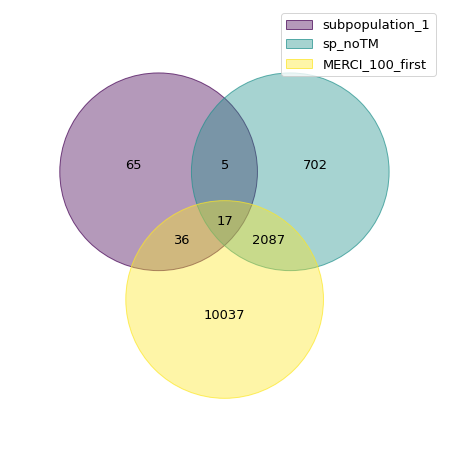

In [99]:
intersection_subp_spnoTM_MERCI(subpopulation1_ids, sp_notm_ids, lst_ids_100_first, nb_supopulation = "1", add_info_merci = "100_first")

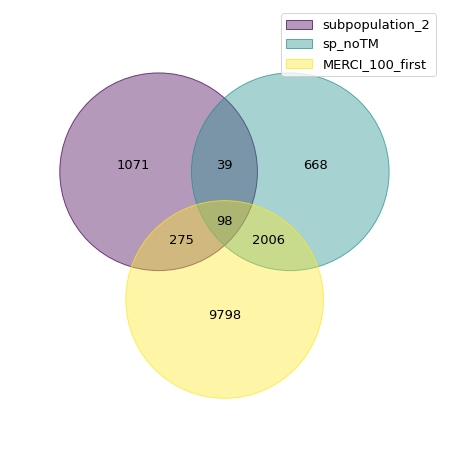

In [100]:
intersection_subp_spnoTM_MERCI(subpopulation2_ids, sp_notm_ids, lst_ids_100_first, nb_supopulation = "2", add_info_merci = "100_first")

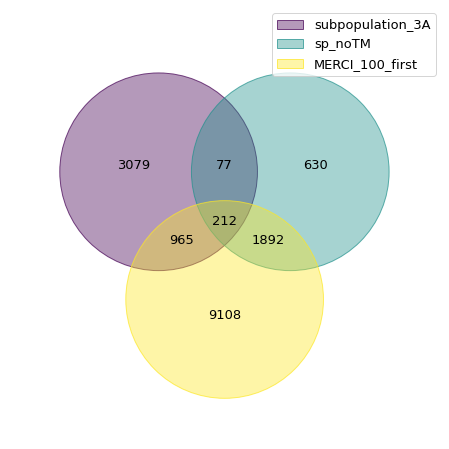

In [101]:
intersection_subp_spnoTM_MERCI(subpopulation3A_ids, sp_notm_ids, lst_ids_100_first, nb_supopulation = "3A", add_info_merci = "100_first")

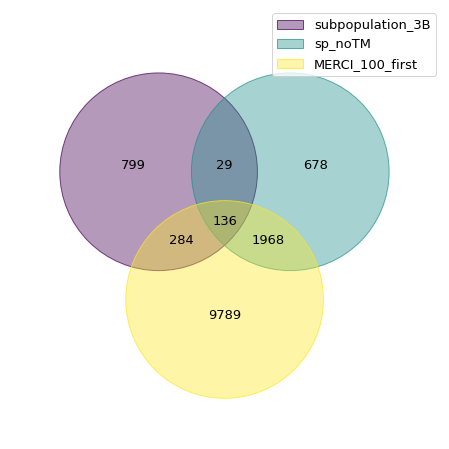

In [102]:
intersection_subp_spnoTM_MERCI(subpopulation3B_ids, sp_notm_ids, lst_ids_100_first, nb_supopulation = "3B", add_info_merci = "100_first")

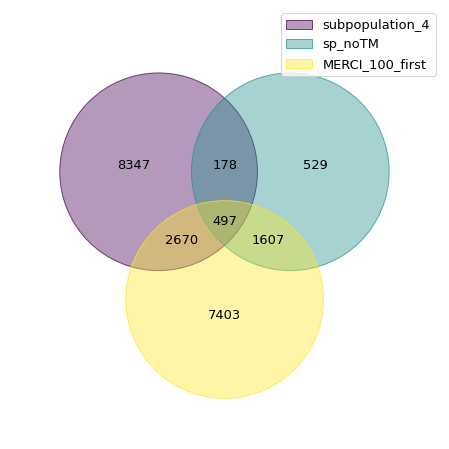

In [103]:
intersection_subp_spnoTM_MERCI(subpopulation4_ids, sp_notm_ids, lst_ids_100_first, nb_supopulation = "4", add_info_merci = "100_first")

### MERCI_30first

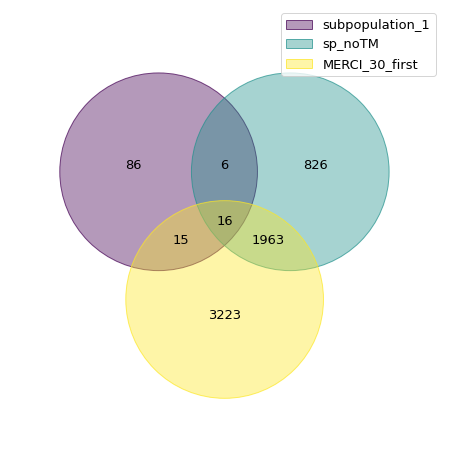

In [104]:
intersection_subp_spnoTM_MERCI(subpopulation1_ids, sp_notm_ids, lst_ids_30_first, nb_supopulation = "1", add_info_merci = "30_first")

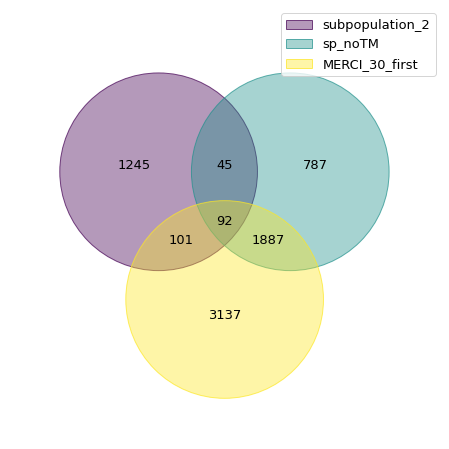

In [105]:
intersection_subp_spnoTM_MERCI(subpopulation2_ids, sp_notm_ids, lst_ids_30_first, nb_supopulation = "2", add_info_merci = "30_first")

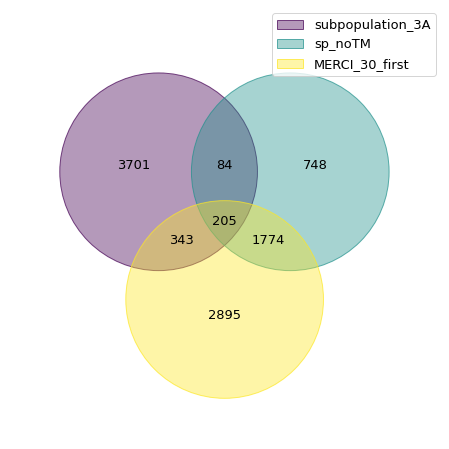

In [106]:
intersection_subp_spnoTM_MERCI(subpopulation3A_ids, sp_notm_ids, lst_ids_30_first, nb_supopulation = "3A", add_info_merci = "30_first")

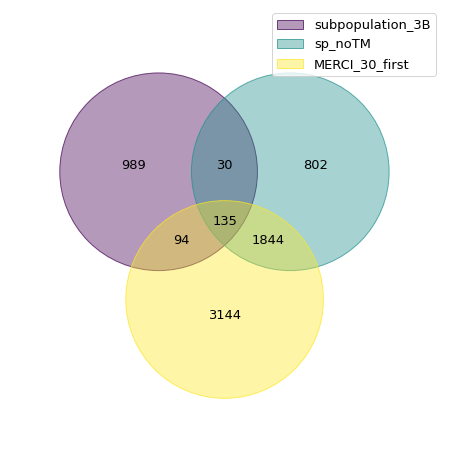

In [107]:
intersection_subp_spnoTM_MERCI(subpopulation3B_ids, sp_notm_ids, lst_ids_30_first, nb_supopulation = "3B", add_info_merci = "30_first")

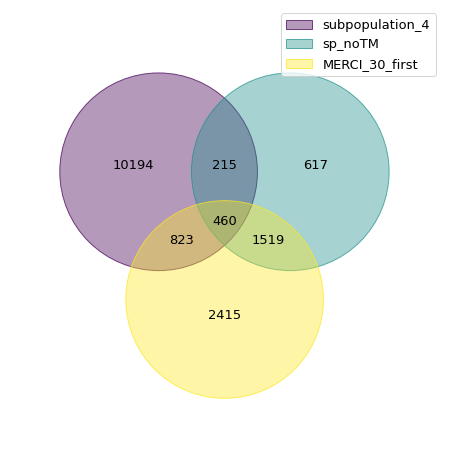

In [108]:
intersection_subp_spnoTM_MERCI(subpopulation4_ids, sp_notm_ids, lst_ids_30_first, nb_supopulation = "4", add_info_merci = "30_first")

## Venn all monster, no subpopulations

In [109]:
## all sequences in the proteome that contain at least an occurrence
## from at least a CLUMP from the 6 best
all_monster_ids = list(cont_id_cluster.id)
len(all_monster_ids)

18879

In [110]:
## sp-noTM ids
len(sp_notm_ids)

2811

In [111]:
## merci first 100 AAs
len(lst_ids_100_first)

12177

In [112]:
## merci first 30 AAs
len(lst_ids_30_first)

5217

### MERCI_100first

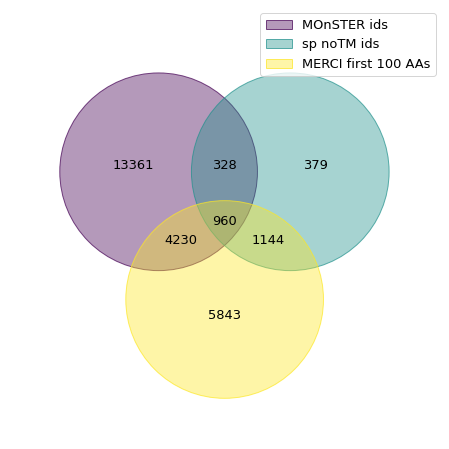

In [113]:
ids = {
"MOnSTER ids" : set(all_monster_ids),
"sp noTM ids" : set(sp_notm_ids),
"MERCI first 100 AAs" : set(lst_ids_100_first)
}

fig = venn(ids)
name_pdf = "venn_MOnSTER_spnoTM_MERCI100.pdf"

fig.figure.savefig(name_pdf)

### MERCI_30first

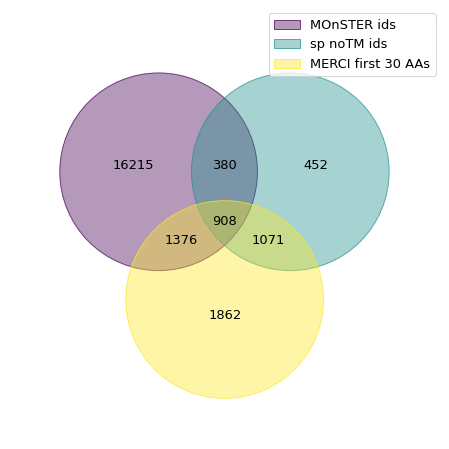

In [114]:
ids = {
"MOnSTER ids" : set(all_monster_ids),
"sp noTM ids" : set(sp_notm_ids),
"MERCI first 30 AAs" : set(lst_ids_30_first)
}

fig = venn(ids)
name_pdf = "venn_MOnSTER_spnoTM_MERCI30.pdf"

fig.figure.savefig(name_pdf)

## Venn all monster, no subpopulations, ONLY POSITIVE DATASET

In [115]:
## Positive dataset ids
len(pos_dset_ids)

161

In [116]:
## Positive dataset found by MOnSTER ids
pos_dset_monster_ids = list(pd.read_csv(
    "subpopulation_all_monster_pos_ids.csv").subpopulation_all_monster_pos_ids)
len(pos_dset_monster_ids)

129

In [117]:
## sp_notm sequences, intersection with positive dataset
sp_notm_pos_dset = list(set(sp_notm_ids).intersection(pos_dset_ids))
len(sp_notm_pos_dset)

68

In [118]:
## merci first 100 AAs, intersection with positive dataset
merci100_pos_dset = list(set(lst_ids_100_first).intersection(pos_dset_ids))
len(merci100_pos_dset)

78

In [119]:
## merci first 30 AAs, intersection with positive dataset
merci30_pos_dset = list(set(lst_ids_30_first).intersection(pos_dset_ids))
len(merci30_pos_dset)

68

### MERCI_100first

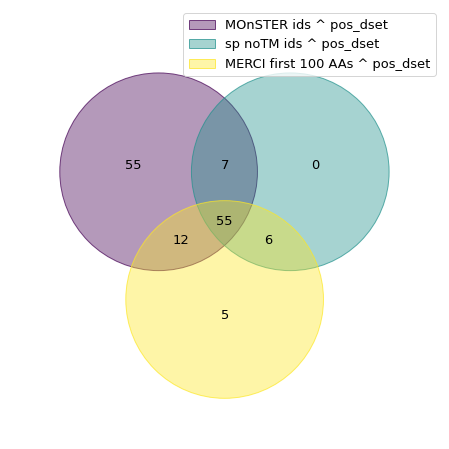

In [120]:
ids = {
"MOnSTER ids ^ pos_dset" : set(pos_dset_monster_ids),
"sp noTM ids ^ pos_dset" : set(sp_notm_pos_dset),
"MERCI first 100 AAs ^ pos_dset" : set(merci100_pos_dset)
}

fig = venn(ids)
name_pdf = "venn_posdset_MOnSTER_spnoTM_MERCI100.pdf"

fig.figure.savefig(name_pdf)

### MERCI_30first

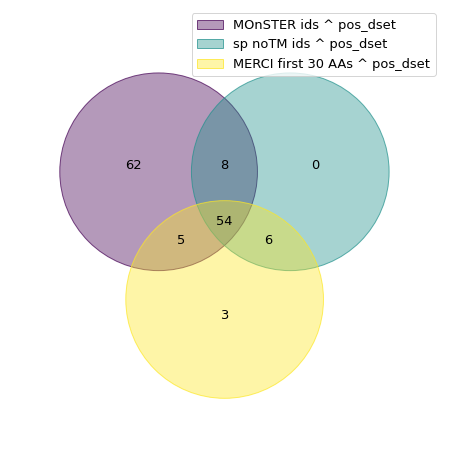

In [121]:
ids = {
"MOnSTER ids ^ pos_dset" : set(pos_dset_monster_ids),
"sp noTM ids ^ pos_dset" : set(sp_notm_pos_dset),
"MERCI first 30 AAs ^ pos_dset" : set(merci30_pos_dset)
}

fig = venn(ids)
name_pdf = "venn_posdset_MOnSTER_spnoTM_MERCI30.pdf"

fig.figure.savefig(name_pdf)

## Venn monster (subp 1,2,3A), no subpopulations, ONLY POSITIVE DATASET

In [122]:
## Positive dataset ids
len(pos_dset_ids)

161

In [123]:
## Subset of monster (subp 1,2,3A)

## subp 1
pos_dset_monster_ids_subp1 = list(
    pd.read_csv("subpopulation_pos_1_ids.csv").subpopulation_pos_1_ids)
print("Positive dataset found by MOnSTER subpopulation 1 ids, length: ", 
      len(pos_dset_monster_ids_subp1))

## subp 2
pos_dset_monster_ids_subp2 = list(pd.read_csv(
    "subpopulation_pos_2_ids.csv").subpopulation_pos_2_ids)
print("Positive dataset found by MOnSTER subpopulation 2 ids, length: ", 
      len(pos_dset_monster_ids_subp2))

## subp 3A
pos_dset_monster_ids_subp3A = list(pd.read_csv(
    "subpopulation_pos_3A_ids.csv").subpopulation_pos_3A_ids)
print("Positive dataset found by MOnSTER subpopulation 3A ids, length: ", 
      len(pos_dset_monster_ids_subp3A))

## concatenate the three lists
pos_dset_monster_ids_subp_1_2_3A = pos_dset_monster_ids_subp1 + pos_dset_monster_ids_subp2 + pos_dset_monster_ids_subp3A
print("Concatenation of the three lists to obtain pos_dset_monster_ids_subp_1_2_3A, length:",
     len(pos_dset_monster_ids_subp_1_2_3A))

Positive dataset found by MOnSTER subpopulation 1 ids, length:  20
Positive dataset found by MOnSTER subpopulation 2 ids, length:  38
Positive dataset found by MOnSTER subpopulation 3A ids, length:  36
Concatenation of the three lists to obtain pos_dset_monster_ids_subp_1_2_3A, length: 94


In [124]:
## sp_notm sequences, intersection with positive dataset
sp_notm_pos_dset = list(set(sp_notm_ids).intersection(pos_dset_ids))
len(sp_notm_pos_dset)

68

In [125]:
## merci first 100 AAs, intersection with positive dataset
merci100_pos_dset = list(set(lst_ids_100_first).intersection(pos_dset_ids))
len(merci100_pos_dset)

78

In [126]:
## merci first 30 AAs, intersection with positive dataset
merci30_pos_dset = list(set(lst_ids_30_first).intersection(pos_dset_ids))
len(merci30_pos_dset)

68

### MERCI_100first

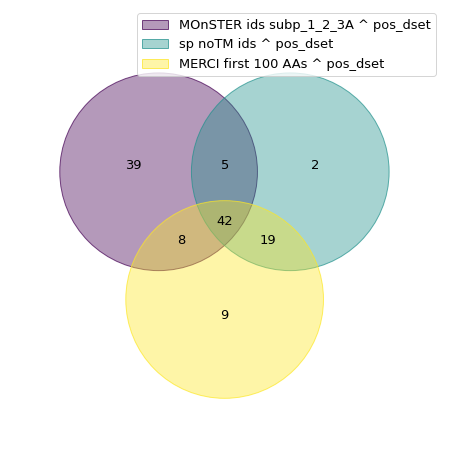

In [127]:
ids = {
"MOnSTER ids subp_1_2_3A ^ pos_dset" : set(pos_dset_monster_ids_subp_1_2_3A),
"sp noTM ids ^ pos_dset" : set(sp_notm_pos_dset),
"MERCI first 100 AAs ^ pos_dset" : set(merci100_pos_dset)
}

fig = venn(ids)
name_pdf = "venn_posdset_MOnSTER_subp_1_2_3A_spnoTM_MERCI100.pdf"

fig.figure.savefig(name_pdf)

### MERCI_30first

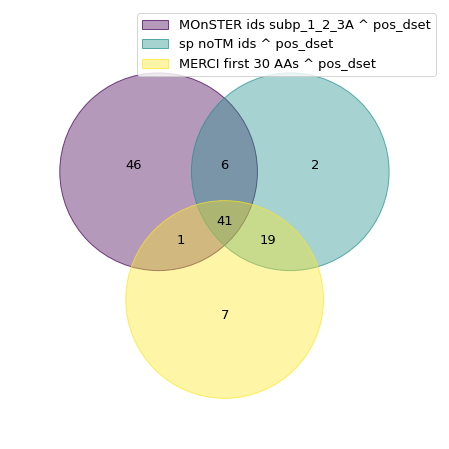

In [128]:
ids = {
"MOnSTER ids subp_1_2_3A ^ pos_dset" : set(pos_dset_monster_ids_subp_1_2_3A),
"sp noTM ids ^ pos_dset" : set(sp_notm_pos_dset),
"MERCI first 30 AAs ^ pos_dset" : set(merci30_pos_dset)
}

fig = venn(ids)
name_pdf = "venn_posdset_MOnSTER_subp_1_2_3A_spnoTM_MERCI30.pdf"

fig.figure.savefig(name_pdf)

## Venn monster (subp 1,2,3A,4), no subpopulations, ONLY POSITIVE DATASET

In [129]:
## Positive dataset ids
len(pos_dset_ids)

161

In [130]:
## Subset of monster (subp 1,2,3A,4)

## subp 1
pos_dset_monster_ids_subp1 = list(
    pd.read_csv("subpopulation_pos_1_ids.csv").subpopulation_pos_1_ids)
print("Positive dataset found by MOnSTER subpopulation 1 ids, length: ", 
      len(pos_dset_monster_ids_subp1))

## subp 2
pos_dset_monster_ids_subp2 = list(pd.read_csv(
    "subpopulation_pos_2_ids.csv").subpopulation_pos_2_ids)
print("Positive dataset found by MOnSTER subpopulation 2 ids, length: ", 
      len(pos_dset_monster_ids_subp2))

## subp 3A
pos_dset_monster_ids_subp3A = list(pd.read_csv(
    "subpopulation_pos_3A_ids.csv").subpopulation_pos_3A_ids)
print("Positive dataset found by MOnSTER subpopulation 3A ids, length: ", 
      len(pos_dset_monster_ids_subp3A))

## subp 3B
pos_dset_monster_ids_subp3B = list(pd.read_csv(
    "subpopulation_pos_3B_ids.csv").subpopulation_pos_3B_ids)
print("Positive dataset found by MOnSTER subpopulation 3B ids, length: ", 
      len(pos_dset_monster_ids_subp3B))

## concatenate the four lists
pos_dset_monster_ids_subp_1_2_3A_3B = pos_dset_monster_ids_subp1 + pos_dset_monster_ids_subp2 + pos_dset_monster_ids_subp3A + pos_dset_monster_ids_subp3B
print("Concatenation of the three lists to obtain pos_dset_monster_ids_subp_1_2_3A_3B, length:",
     len(pos_dset_monster_ids_subp_1_2_3A_3B))

Positive dataset found by MOnSTER subpopulation 1 ids, length:  20
Positive dataset found by MOnSTER subpopulation 2 ids, length:  38
Positive dataset found by MOnSTER subpopulation 3A ids, length:  36
Positive dataset found by MOnSTER subpopulation 3B ids, length:  12
Concatenation of the three lists to obtain pos_dset_monster_ids_subp_1_2_3A_3B, length: 106


In [131]:
## sp_notm sequences, intersection with positive dataset
sp_notm_pos_dset = list(set(sp_notm_ids).intersection(pos_dset_ids))
len(sp_notm_pos_dset)

68

In [132]:
## merci first 100 AAs, intersection with positive dataset
merci100_pos_dset = list(set(lst_ids_100_first).intersection(pos_dset_ids))
len(merci100_pos_dset)

78

In [133]:
## merci first 30 AAs, intersection with positive dataset
merci30_pos_dset = list(set(lst_ids_30_first).intersection(pos_dset_ids))
len(merci30_pos_dset)

68

### MERCI_100first

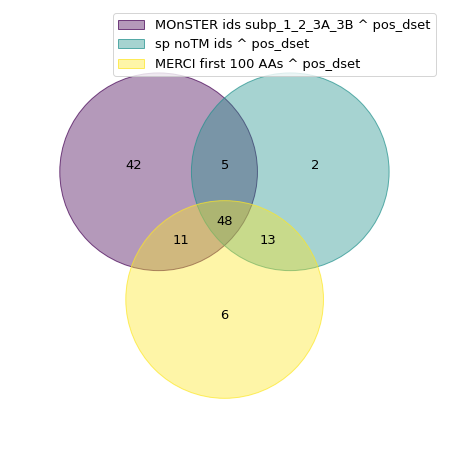

In [134]:
ids = {
"MOnSTER ids subp_1_2_3A_3B ^ pos_dset" : set(pos_dset_monster_ids_subp_1_2_3A_3B),
"sp noTM ids ^ pos_dset" : set(sp_notm_pos_dset),
"MERCI first 100 AAs ^ pos_dset" : set(merci100_pos_dset)
}

fig = venn(ids)
name_pdf = "venn_posdset_MOnSTER_subp_1_2_3A_3B_spnoTM_MERCI100.pdf"

fig.figure.savefig(name_pdf)

### MERCI_30first

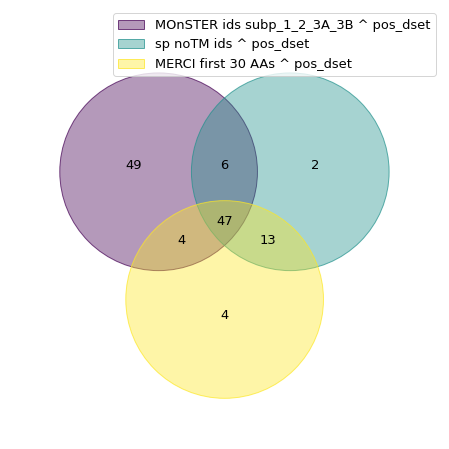

In [135]:
ids = {
"MOnSTER ids subp_1_2_3A_3B ^ pos_dset" : set(pos_dset_monster_ids_subp_1_2_3A_3B),
"sp noTM ids ^ pos_dset" : set(sp_notm_pos_dset),
"MERCI first 30 AAs ^ pos_dset" : set(merci30_pos_dset)
}

fig = venn(ids)
name_pdf = "venn_posdset_MOnSTER_subp_1_2_3A_3B_spnoTM_MERCI30.pdf"

fig.figure.savefig(name_pdf)

## Venn proteome (only subp 1,2,3A,3B)

In [141]:
## sequences of the proteome, belonging to subpopulations 1,2,3A,3B
monster_prot_subp_1_2_3A_3B = subpopulation1_ids + subpopulation2_ids+ subpopulation3A_ids + subpopulation3B_ids
print("subpopulation1_ids: ", len(subpopulation1_ids))
print("subpopulation2_ids: ", len(subpopulation2_ids))
print("subpopulation3A_ids: ", len(subpopulation3A_ids))
print("subpopulation3B_ids: ", len(subpopulation3B_ids))
print("monster_prot_subp_1_2_3A_3B: ", len(monster_prot_subp_1_2_3A_3B))

subpopulation1_ids:  123
subpopulation2_ids:  1483
subpopulation3A_ids:  4333
subpopulation3B_ids:  1248
monster_prot_subp_1_2_3A_3B:  7187


In [110]:
## sp-noTM ids
len(sp_notm_ids)

2811

In [111]:
## merci first 100 AAs
len(lst_ids_100_first)

12177

In [112]:
## merci first 30 AAs
len(lst_ids_30_first)

5217

### MERCI_100first

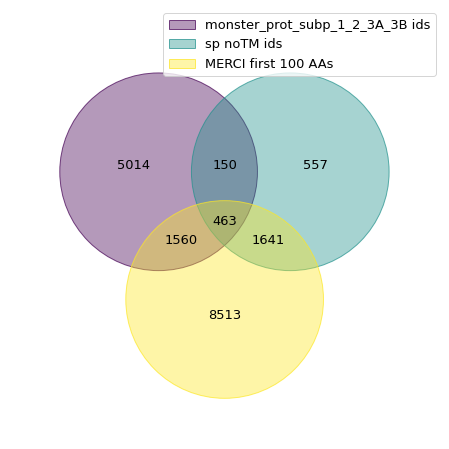

In [143]:
ids = {
"monster_prot_subp_1_2_3A_3B ids" : set(monster_prot_subp_1_2_3A_3B),
"sp noTM ids" : set(sp_notm_ids),
"MERCI first 100 AAs" : set(lst_ids_100_first)
}

fig = venn(ids)
name_pdf = "venn_monster_prot_subp_1_2_3A_3B_spnoTM_MERCI100.pdf"

fig.figure.savefig(name_pdf)

### MERCI_30first

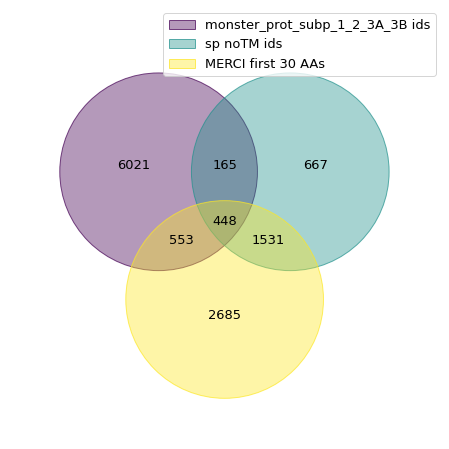

In [144]:
ids = {
"monster_prot_subp_1_2_3A_3B ids" : set(monster_prot_subp_1_2_3A_3B),
"sp noTM ids" : set(sp_notm_ids),
"MERCI first 30 AAs" : set(lst_ids_30_first)
}

fig = venn(ids)
name_pdf = "venn_monster_prot_subp_1_2_3A_3B_spnoTM_MERCI30.pdf"

fig.figure.savefig(name_pdf)